In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the merged NHS dataset (adjust file path if needed)
nhs_all = pd.read_csv("nhs_ae_merged.csv")

# Convert 'year' to a categorical variable
nhs_all["year"] = nhs_all["year"].astype(str)

# Display first few rows
nhs_all.head()


,period,org_code,parent_org,org_name,a&e_attendances_type_1,a&e_attendances_type_2,a&e_attendances_other_a&e_department,a&e_attendances_booked_appointments_type_1,a&e_attendances_booked_appointments_type_2,a&e_attendances_booked_appointments_other_department,...,attendances_over_4hrs_booked_appointments_other_department,patients_who_have_waited_4-12_hs_from_dta_to_admission,patients_who_have_waited_12+_hrs_from_dta_to_admission,emergency_admissions_via_a&e_-_type_1,emergency_admissions_via_a&e_-_type_2,emergency_admissions_via_a&e_-_other_a&e_department,other_emergency_admissions,month,year,percentage_seen_within_4_hours
0,MSitAE-APRIL-2024,AAH,NHS ENGLAND SOUTH WEST,TETBURY HOSPITAL TRUST LTD,0,0,546,0,0,0,...,0,0,0,0,0,0,0,April,2024,NaN
1,MSitAE-APRIL-2024,RAN,NHS ENGLAND LONDON,ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST,0,0,0,0,0,0,...,0,0,0,0,0,0,41,April,2024,NaN
2,MSitAE-APRIL-2024,8J094,NHS ENGLAND MIDLANDS,BADGER LTD,0,0,0,0,0,2078,...,0,0,0,0,0,0,0,April,2024,NaN
3,MSitAE-APRIL-2024,AD913,NHS ENGLAND LONDON,BECKENHAM BEACON UCC,0,0,3694,0,0,104,...,0,0,0,0,0,0,0,April,2024,NaN
4,MSitAE-APRIL-2024,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0,0,2897,0,0,7,...,0,0,0,0,0,0,0,April,2024,NaN


In [4]:
# Check for missing values
print(nhs_all.isnull().sum())

# Ensure 'month' is categorical
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
nhs_all['month'] = pd.Categorical(nhs_all['month'], categories=months_order, ordered=True)

# Summary statistics
nhs_all.describe()



period                                                           0
org_code                                                         0
parent_org                                                       0
org_name                                                         0
a&e_attendances_type_1                                           0
a&e_attendances_type_2                                           0
a&e_attendances_other_a&e_department                             0
a&e_attendances_booked_appointments_type_1                       0
a&e_attendances_booked_appointments_type_2                       0
a&e_attendances_booked_appointments_other_department             0
attendances_over_4hrs_type_1                                     0
attendances_over_4hrs_type_2                                     0
attendances_over_4hrs_other_department                           0
attendances_over_4hrs_booked_appointments_type_1                 0
attendances_over_4hrs_booked_appointments_type_2              

,a&e_attendances_type_1,a&e_attendances_type_2,a&e_attendances_other_a&e_department,a&e_attendances_booked_appointments_type_1,a&e_attendances_booked_appointments_type_2,a&e_attendances_booked_appointments_other_department,attendances_over_4hrs_type_1,attendances_over_4hrs_type_2,attendances_over_4hrs_other_department,attendances_over_4hrs_booked_appointments_type_1,attendances_over_4hrs_booked_appointments_type_2,attendances_over_4hrs_booked_appointments_other_department,patients_who_have_waited_4-12_hs_from_dta_to_admission,patients_who_have_waited_12+_hrs_from_dta_to_admission,emergency_admissions_via_a&e_-_type_1,emergency_admissions_via_a&e_-_type_2,emergency_admissions_via_a&e_-_other_a&e_department,other_emergency_admissions,percentage_seen_within_4_hours
count,7.299000e+03,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,7299.000000,4464.000000
mean,1.321404e+04,428.199479,7071.958076,290.744212,4.555419,420.692150,5253.735854,15.890670,304.040554,68.884231,0.080833,7.671188,974.024113,351.139608,3772.605014,13.367859,50.751610,1319.585697,60.333005
std,9.374502e+04,3112.581441,50336.341184,2090.705326,48.133695,3056.201506,37502.109481,121.883654,2294.742717,505.559881,1.000569,62.650289,6933.273472,2605.565247,26778.081451,111.054846,377.198816,9378.465961,14.015017
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.756582
25%,0.000000e+00,0.000000,303.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.325856
50%,6.786000e+03,0.000000,2523.000000,0.000000,0.000000,0.000000,2355.000000,0.000000,7.000000,0.000000,0.000000,0.000000,331.000000,4.000000,1764.000000,0.000000,0.000000,403.000000,58.236780
75%,1.103050e+04,0.000000,5636.000000,149.500000,0.000000,124.000000,4396.500000,0.000000,149.000000,15.500000,0.000000,0.000000,771.000000,263.000000,3152.000000,0.000000,0.000000,1068.000000,65.790142
max,1.439178e+06,50804.000000,841230.000000,35306.000000,1586.000000,54131.000000,633815.000000,2370.000000,76062.000000,9567.000000,25.000000,1478.000000,115548.000000,54573.000000,420025.000000,1558.000000,7719.000000,147086.000000,100.000000


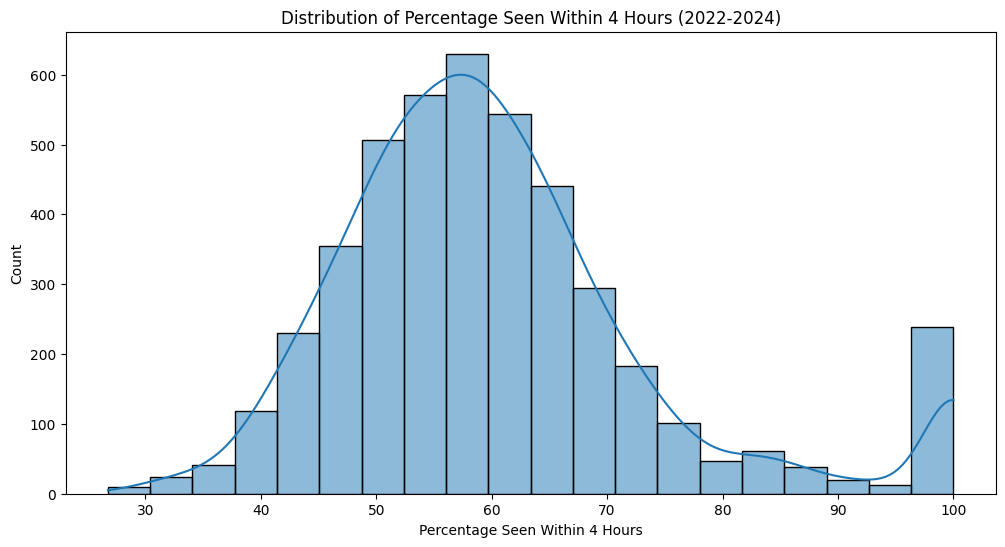

In [5]:
# Histogram of Percentage Seen Within 4 Hours
plt.figure(figsize=(12, 6))
sns.histplot(nhs_all['percentage_seen_within_4_hours'], bins=20, kde=True)
plt.xlabel("Percentage Seen Within 4 Hours")
plt.ylabel("Count")
plt.title("Distribution of Percentage Seen Within 4 Hours (2022-2024)")
plt.show()


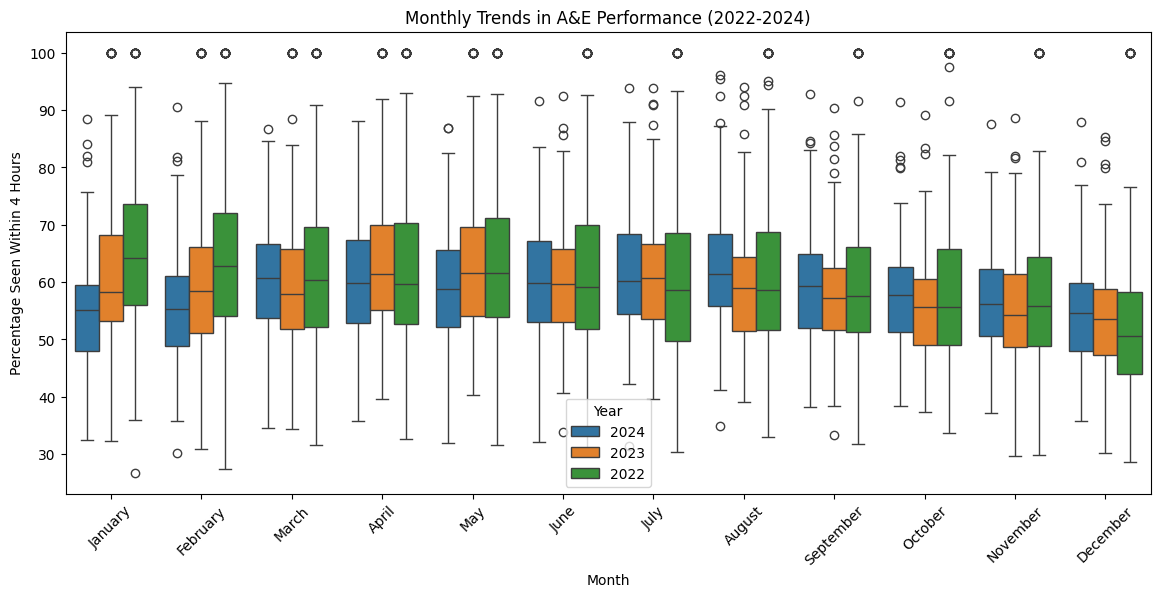

In [6]:
# Monthly Trends in A&E Performance
plt.figure(figsize=(14, 6))
sns.boxplot(data=nhs_all, x="month", y="percentage_seen_within_4_hours", hue="year")
plt.xlabel("Month")
plt.ylabel("Percentage Seen Within 4 Hours")
plt.title("Monthly Trends in A&E Performance (2022-2024)")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()


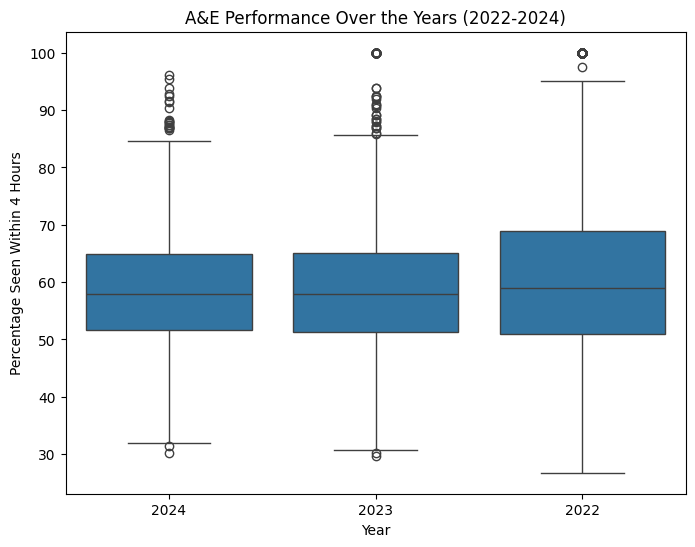

In [7]:
# Overall Performance Comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=nhs_all, x="year", y="percentage_seen_within_4_hours")
plt.xlabel("Year")
plt.ylabel("Percentage Seen Within 4 Hours")
plt.title("A&E Performance Over the Years (2022-2024)")
plt.show()
